# Project 1

### Xudong Chen; Zhengxian Li

### 6/2/2022

## Introduction

In this project, we will work for a dataset [***bikeDetail.csv***]("https://www.kaggle.com/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv"), which contains information of the selling bike. There are 7 variables in this whole dataset. Here is the description:

Number | Variable      | Type    | Description
------ | ------------- | ------- | -------------------------------------------------------
1      | name        | object  | motorbike's name
2      | selling_price           | numeric  | motorbike's selling price
3      | year           | numeric | motorbike's year
4      | seller_type       | object  | type of motorbike's seller
5      | owner       | object  | # of owners
6      | km_driven       | numeric  | the kilometers motorbike has driven 
7      | ex_showroom_price          | numeric | motorbike's expected price

There are three parts in the project:
- Introduction
- EDA
- Prediction of `selling_price`

The purposes are to know how to do exploratory data analysis with summaries and graphs and two methods to predict the selling price. The get the purposes, there are several modules we will use:

Name | Application in this project      
------ | ------------- 
pandas      | analyze the data based on dataframe and series 
numpy      | calculate the statistics for the numeric variables
matplotlib.pyplot      | Plot the figures we need
seaborn    | Plot density
scipy.stats | For trend line plot

Let's import these modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Let's import the data as a dataframe using `pd.read_csv()`.

In [2]:
bike = pd.read_csv("bikeDetails.csv")

Let's show the first five rows.

In [3]:
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Let's show the information of this dataset.

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


From the summary, we can find that there are 1061 bikes' information in this dataset. Except the `ex_showroom_price` variable, there is no null value.

## EDA

In this dataset, what we most interested are the variable `selling_price` and how other variables affect it. Let's firstly find the center and spread of this single variable and plots the distribution.

#### EDA for category variable<br>
__we make some variable type changes above and in this subsection we focus on these variable own relationship between each other__
* number of occurrence of different variables

In [5]:
print("Different type owner numbers")
print(bike.owner.value_counts(),"\n")
print("Different type of seller")
print(bike.seller_type.value_counts(),"\n")
print("Different years")
print(bike.year.value_counts())

Different type owner numbers
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64 

Different type of seller
Individual    1055
Dealer           6
Name: seller_type, dtype: int64 

Different years
2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
2007     29
2008     28
2009     28
2006     20
2005     14
2000      6
2004      5
2002      3
2020      3
1998      3
1997      2
2001      2
1988      1
1999      1
1991      1
2003      1
1993      1
1995      1
Name: year, dtype: int64


* Stacked, sides by sides plots and cross table betwwen owner type and seller type

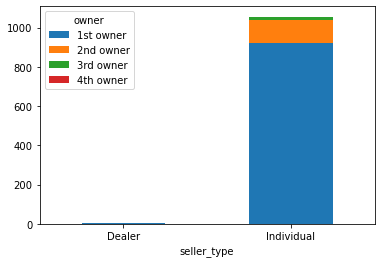

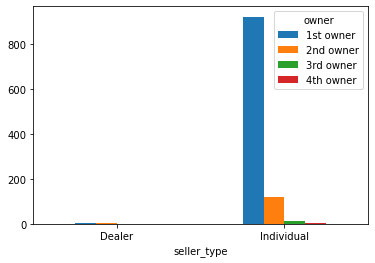

owner,1st owner,2nd owner,3rd owner,4th owner,All
seller_type,,,,,
Dealer,4,2,0,0,6
Individual,920,121,11,3,1055
All,924,123,11,3,1061


In [6]:
table = pd.crosstab(bike.seller_type,bike.owner)
table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.show()
table = pd.crosstab(bike.seller_type,bike.owner)
table.plot.bar()
plt.xticks(rotation = 0)
plt.show()
table = pd.crosstab(bike.seller_type,bike.owner,margins = True)
table

___According to the plot and table, we could clearly see the distribution of owner and seller, in motorbike market, most seller is individual which occupy 99.4% of total seller, dealer much less than individual seller, almost none, meanwhile most owner is 1st owner, occupying 87.1%, 2nd owner only occupying 11.6%, with negligible rest owner type___<br>

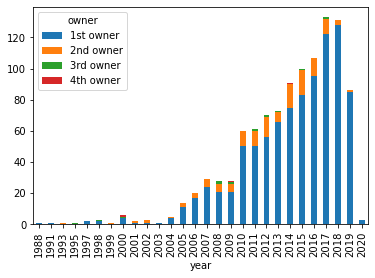

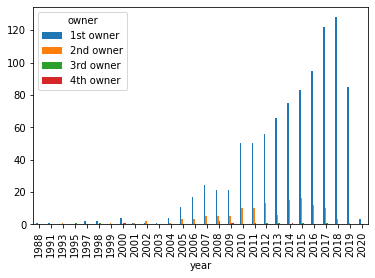

owner,1st owner,2nd owner,3rd owner,4th owner,All
year,,,,,
1988,1,0,0,0,1
1991,1,0,0,0,1
1993,0,1,0,0,1
1995,0,0,1,0,1
1997,2,0,0,0,2
1998,2,0,1,0,3
1999,0,1,0,0,1
2000,4,0,1,1,6
2001,1,1,0,0,2


In [8]:
table = pd.crosstab(bike.year,bike.owner)
table.plot.bar(stacked = True)
plt.show()
table = pd.crosstab(bike.year,bike.owner)
table.plot.bar()
plt.show()
table = pd.crosstab(bike.year,bike.owner,margins = True)
table

### EDA for single response variable

In [12]:
print([bike.selling_price.mean(), bike.selling_price.median(), bike.selling_price.std(), bike.selling_price.max(),bike.selling_price.min()])
print("Describe of Motor price")
print(bike["selling_price"].describe(),"\n")

[59638.151743638075, 45000.0, 56304.29197302424, 760000, 5000]
Describe of Motor price
count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64 



Numeric summary for `selling_price`:

Mean | Median      | Standard Derivation   | Max | Min   
------ | ------------- | ------- | -------------------- | --------- 
59638.1517      | 45000.0        | 56304.2920  | 760000 | 5000 

Plot the histogram and distribution of `selling_price` and `km_driven`.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


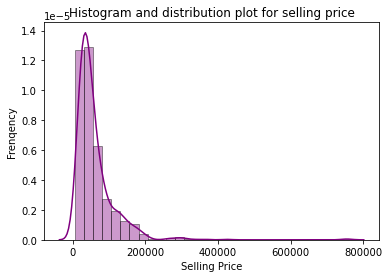

In [13]:
sns.distplot(a=bike.selling_price, bins=30, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for selling price")
plt.xlabel("Selling Price")
plt.ylabel("Frenqency")
plt.show()

__Most motorbike were sold in price below 200000__<br>

Plot the boxplot of `selling_price`.

Text(0, 0.5, 'Price')

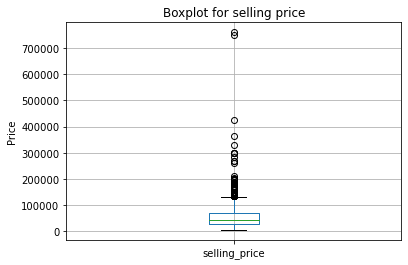

In [14]:
bike.boxplot(column='selling_price')
plt.title("Boxplot for selling price")
plt.ylabel("Price")

<AxesSubplot:xlabel='year', ylabel='selling_price'>

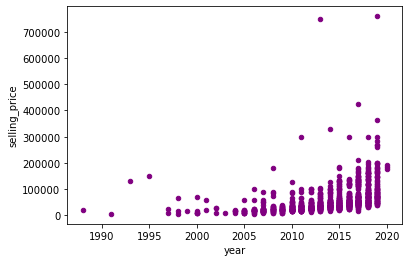

In [15]:
bike.plot.scatter(x = "year", y = "selling_price",c = "purple")

___From the numeric summary and two figures, we can find most of the prices are located in the area that the price is less 50000. However, there are several motor bikes has extremely high prices even more than 700000.___

* Basic description and plot for `km_driven`

In [16]:
print("Describe of Motor driven kilometer")
print(bike["km_driven"].describe(),"\n")

Describe of Motor driven kilometer
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 



D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


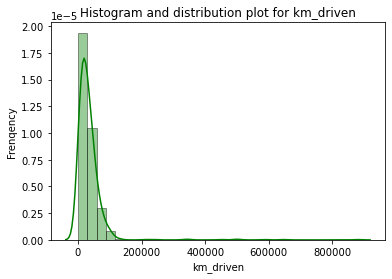

In [17]:
sns.distplot(a=bike.km_driven, bins=30, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for km_driven")
plt.xlabel("km_driven")
plt.ylabel("Frenqency")
plt.show()

Text(0, 0.5, 'km_driven')

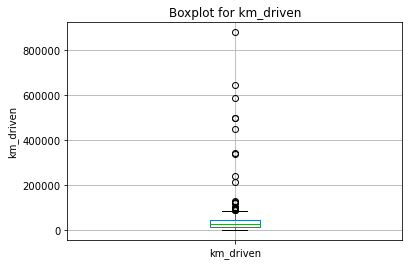

In [18]:
bike.boxplot(column='km_driven')
plt.title("Boxplot for km_driven")
plt.ylabel("km_driven")

<AxesSubplot:xlabel='year', ylabel='selling_price'>

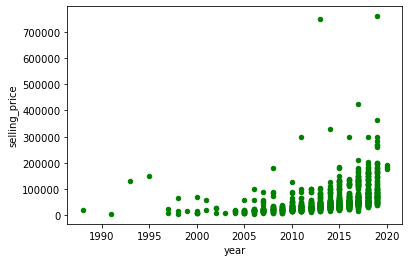

In [19]:
bike.plot.scatter(x = "year", y = "selling_price",c = "green")

* Basic description and plot for `ex_showroom_price`

In [20]:
print("Describe of ex_showroom_price")
print(bike["ex_showroom_price"].describe(),"\n")

Describe of ex_showroom_price
count    6.260000e+02
mean     8.795871e+04
std      7.749659e+04
min      3.049000e+04
25%      5.485200e+04
50%      7.275250e+04
75%      8.703150e+04
max      1.278000e+06
Name: ex_showroom_price, dtype: float64 



D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


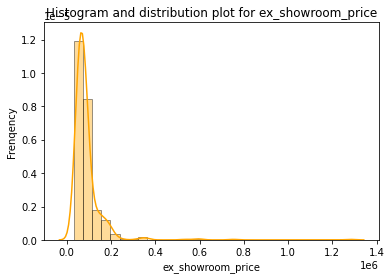

In [21]:
sns.distplot(a=bike.ex_showroom_price, bins=30, color='orange',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for ex_showroom_price")
plt.xlabel("ex_showroom_price")
plt.ylabel("Frenqency")
plt.show()

Text(0, 0.5, 'ex_showroom_price')

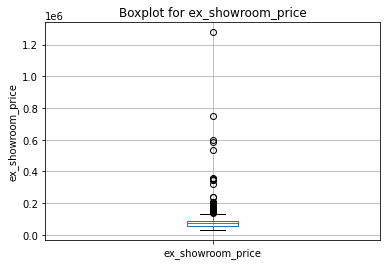

In [22]:
bike.boxplot(column='ex_showroom_price')
plt.title("Boxplot for ex_showroom_price")
plt.ylabel("ex_showroom_price")

<AxesSubplot:xlabel='year', ylabel='ex_showroom_price'>

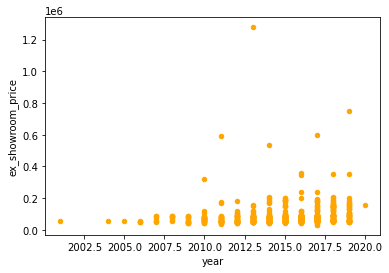

In [23]:
bike.plot.scatter(x = "year", y = "ex_showroom_price",c = "orange")

### Relationship between response variable and numeric variables

* Some relationship between `selling price` and `km_driven`

In [24]:
print("Correlation between selling price and driven kilometer\n")
print(bike[["selling_price","km_driven"]].corr())

Correlation between selling price and driven kilometer

               selling_price  km_driven
selling_price       1.000000  -0.212937
km_driven          -0.212937   1.000000


In [25]:
no_naMotor = bike[["selling_price","km_driven"]].dropna()
slope,intercept,*_ = stats.linregress(no_naMotor.km_driven,no_naMotor.selling_price)
print(intercept,slope)

67618.07212024048 -0.23224560886746437


Let's plot scatter with trend line for developing relationship explicitly via graph

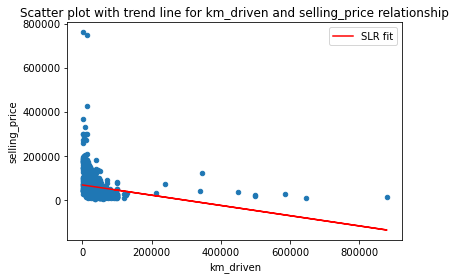

In [26]:
yhat = intercept + slope*no_naMotor.km_driven
fit = pd.DataFrame(zip(no_naMotor.km_driven,yhat))
fit.columns = ["x","yhat"]
bike.plot.scatter(x = "km_driven",y = "selling_price")
plt.plot(no_naMotor.km_driven,yhat,c = "red",label = "SLR fit")
plt.title("Scatter plot with trend line for km_driven and selling_price relationship")
plt.legend()
plt.show()

___Relationship between km_driven and selling price is negative, and most sample is cluster below 200000___

Let's see what happened for kmdrive and seller price in each year, check if they have seasonal trend

Text(0.5, 1.0, 'Mean of sellingprice and kmdrive in each years')

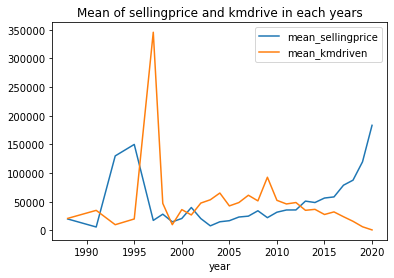

In [27]:
mean_data = bike.groupby("year").agg(
mean_sellingprice = ("selling_price", np.mean),
mean_kmdriven = ("km_driven", np.mean)
)
mean_data.plot.line()
plt.title("Mean of sellingprice and kmdrive in each years")

__In most year the mean of selling price have the same trend with km_driven__ 

* Some relationship between `selling price` and `ex_showroom_price`

In [28]:
print("Correlation between selling price and ex_showroom_price\n")
print(bike[["selling_price","ex_showroom_price"]].corr())

Correlation between selling price and ex_showroom_price

                   selling_price  ex_showroom_price
selling_price           1.000000           0.918583
ex_showroom_price       0.918583           1.000000


__We found a high correlation between selling price and ex_showroom price__

In [29]:
no_naMotor = bike[["selling_price","ex_showroom_price"]].dropna()
slope,intercept,*_ = stats.linregress(no_naMotor.ex_showroom_price,no_naMotor.selling_price)
print(intercept,slope)

-3010.6984020536765 0.7100588453119134


Let's plot scatter with trend line for developing relationship explicitly via graph

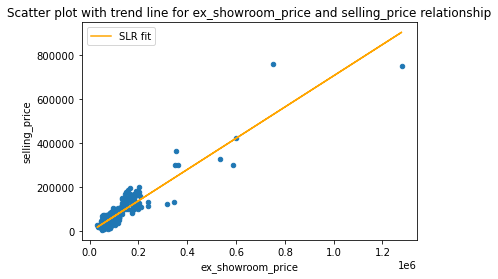

In [30]:
plt.close()
yhat = intercept + slope*no_naMotor.ex_showroom_price
fit = pd.DataFrame(zip(no_naMotor.ex_showroom_price,yhat))
fit.columns = ["x","yhat"]
bike.plot.scatter(x = "ex_showroom_price",y = "selling_price")
plt.plot(no_naMotor.ex_showroom_price,yhat,c = "orange",label = "SLR fit")
plt.title("Scatter plot with trend line for ex_showroom_price and selling_price relationship")
plt.legend()
plt.show()

__The relationship between selling price and ex_showroom price is positive, same as previous trend plot, most sample points are cluster__

Text(0.5, 1.0, 'Mean of sellerprice and ex_showroom_price in each years')

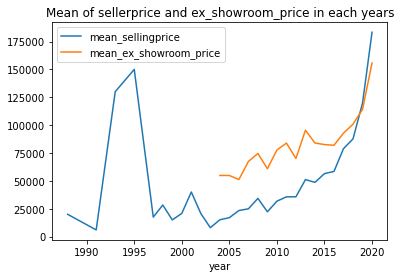

In [31]:
plt.close()
mean_data = bike.groupby("year").agg(
mean_sellingprice = ("selling_price", np.mean),
mean_ex_showroom_price = ("ex_showroom_price", np.mean)
)
mean_data.plot.line()
plt.title("Mean of sellerprice and ex_showroom_price in each years")

__Although ex_showroom price start from 2005, we still found same trend between selling price and ex_showroom price__

### Relationship between response variable and object variables

In this part, we will explore the relationship between the response variable `selling_price` and the two object variables: `seller_type` and `owner`. 

Let's group the dataset by `seller_type`:

In [32]:
bike.groupby("seller_type").selling_price.agg(["mean","median","std","max","min","count"])

,mean,median,std,max,min,count
seller_type,,,,,,
Dealer,46666.666667,44000.0,25734.542286,80000,15000,6
Individual,59711.923223,45000.0,56427.961672,760000,5000,1055


**From the above table, we can find The mean and median of `individual` are higher than the `dealer` and the spread of individual is higher than the dealer too.**

Let's create the histogram for the `selling_price` across the `seller_type`.

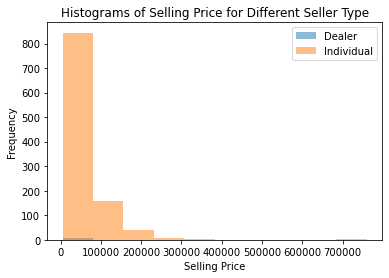

In [33]:
Dealer_price = bike.loc[bike.seller_type == "Dealer", "selling_price"]
Individual_price = bike.loc[bike.seller_type == "Individual", "selling_price"]
price_by_seller = pd.DataFrame([pd.Series(Dealer_price), pd.Series(Individual_price)]).transpose()
price_by_seller.columns = ["Dealer", "Individual"]
price_by_seller.plot.hist(alpha = 0.5)
plt.xlabel("Selling Price")
plt.title("Histograms of Selling Price for Different Seller Type")
plt.legend()
plt.show()
plt.close()

From the above figure, because the count of the "Dealer" seller type is so small, I will plot it individually.

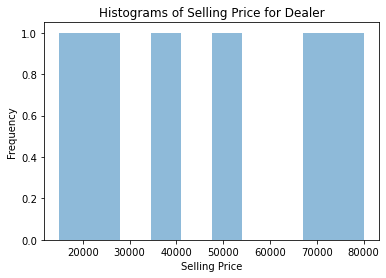

In [34]:
price_by_seller["Dealer"].plot.hist(alpha = 0.5)
plt.xlabel("Selling Price")
plt.title("Histograms of Selling Price for Dealer")
plt.show()
plt.close()

Let's plot a boxplot.

Text(0, 0.5, 'Price')

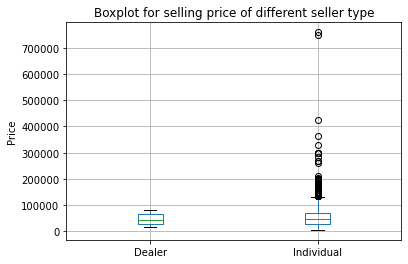

In [35]:
price_by_seller.boxplot()
plt.title("Boxplot for selling price of different seller type")
plt.ylabel("Price")

**We can found that the histograms of different seller type are much different. When the seller type is "Individual", there is a obviously decreasing trend for frenqency as the selling price increases, but there is almost a uniform distribution for "Dealer" if we just observe the above figure. However, the sample of "Dealer" is too small so that this conclusion may be inaccurate.**

Let's group the dataset by `owner`:

In [36]:
bike.groupby("owner").selling_price.agg(["mean","median","std","max","min","count"])

,mean,median,std,max,min,count
owner,,,,,,
1st owner,60022.813853,45000.0,51542.569711,760000,5000,924
2nd owner,55666.658537,32000.0,81671.923395,750000,6000,123
3rd owner,55727.272727,45000.0,38385.129697,150000,20000,11
4th owner,118333.333333,15000.0,183325.757419,330000,10000,3


**From the above table, as the owner's from 1st to 4th, the count of motorbike is smaller and smaller, the spread has a trend of increasing while the center has a trend of decreasing. We can also find that the mean of selling price of `4th owner` is extremely high which can be explained as the count of this group is so small.**

Considering that the count numbers of different type of owner are much different, so we still plot the histograms respectively.

array([[<AxesSubplot:title={'center':'1st owner'}>,
        <AxesSubplot:title={'center':'2nd owner'}>],
       [<AxesSubplot:title={'center':'3rd owner'}>,
        <AxesSubplot:title={'center':'4th owner'}>]], dtype=object)

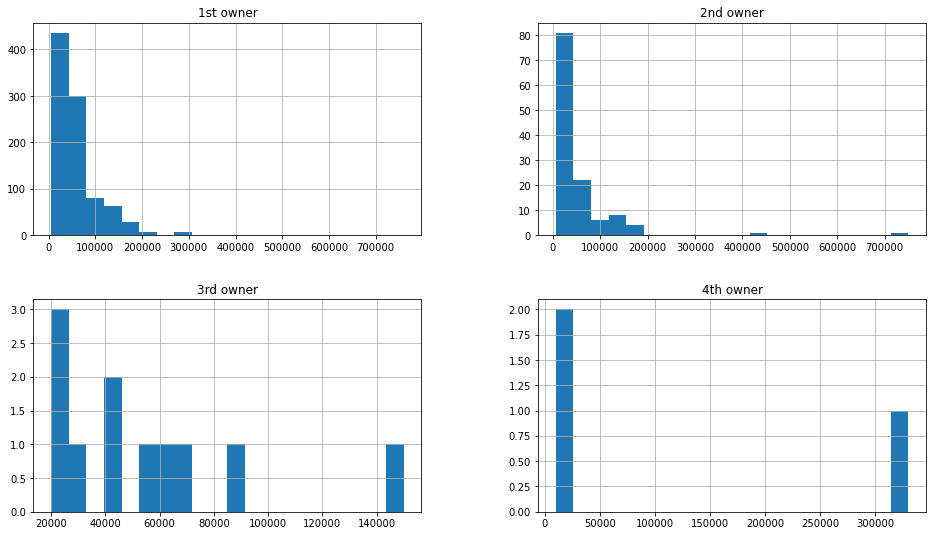

In [37]:
first_price = bike.loc[bike.owner == "1st owner", "selling_price"]
second_price = bike.loc[bike.owner == "2nd owner", "selling_price"]
third_price = bike.loc[bike.owner == "3rd owner", "selling_price"]
fourth_price = bike.loc[bike.owner == "4th owner", "selling_price"]
price_by_owner = pd.DataFrame([pd.Series(first_price), pd.Series(second_price), pd.Series(third_price), pd.Series(fourth_price)]).transpose()
price_by_owner.columns = ["1st owner", "2nd owner", "3rd owner", "4th owner"]
price_by_owner.hist(bins=20, layout = (2,2), figsize=(16, 9))

Let's plot the boxplot.

Text(0, 0.5, 'Price')

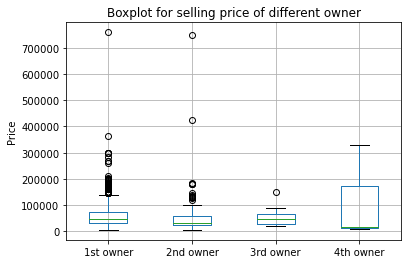

In [38]:
price_by_owner.boxplot()
plt.title("Boxplot for selling price of different owner")
plt.ylabel("Price")

**From the above figures, we can find that for these four different types, the distributions are similar with positive skewness. The center is decreasing from 1st owner to 2nd owner, which is same as the common sense. But the distributions of 3rd owner and 4th owner are unstable because of the small sample.**

### Relationship between response variable and numeric variables

In this part, we will explore the relationship between the response variable `selling_price` and the two numeric variables: `year` and `km_driven`. Before we do that, according to our common sense, the selling price might increase as the year increases or the kilometers driven decreases. Let's verify that.

Firstly, we create the scatter plot between the `selling_price` and `year`.

Text(0.5, 1.0, 'Scatter Plot between selling price and year')

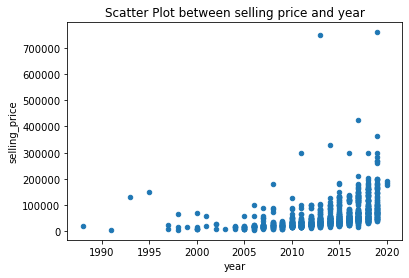

In [39]:
bike.plot.scatter(x = "year", y = "selling_price")
plt.title("Scatter Plot between selling price and year")

**From the above plot, we can find that there indeed a increasing trend of the selling price as the year increases.**

Let's group the selling price by `year` then calculate the mean value of `selling_price` of each group. Plot a line chart for that.

Text(0.5, 1.0, 'Line Chart for mean price of each year')

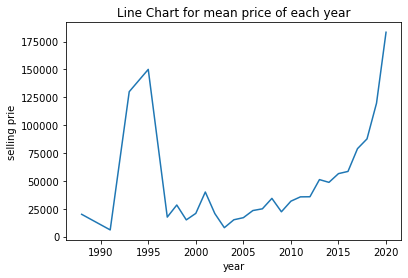

In [40]:
price_by_year = bike.groupby("year").selling_price.mean()
price_by_year.plot()
plt.ylabel("selling prie")
plt.title("Line Chart for mean price of each year")

**From the above line chart, it is easy to find the increasing trend even though there are two outliers in 1993 and 1995. The outliers could be explained by the size of sample.**

Then, let's make a scatter plot between `selling_price` and `km_driven`.

Text(0.5, 1.0, 'Scatter Plot between selling price and km driven')

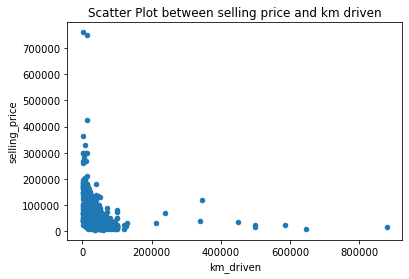

In [41]:
bike.plot.scatter(x = "km_driven", y = "selling_price")
plt.title("Scatter Plot between selling price and km driven")

**From the above scatter plot, there is a decreasing trend as the km_driven increases. Different from `year`, `km_driven` is not fit for the line chart.**

### Relationship between year and owner

From the above two parts, we know that the selling price may increase as the number of owners decrease or the year increases. Whether there is a relationship between the `year` and `owner`.

Firstly, we create a two-way contingency table based on `year` and `owner`.

In [42]:
year_owner = pd.crosstab(bike.year, bike.owner)
year_owner.head()

owner,1st owner,2nd owner,3rd owner,4th owner
year,,,,
1988,1,0,0,0
1991,1,0,0,0
1993,0,1,0,0
1995,0,0,1,0
1997,2,0,0,0


Let's create a stacked bar graph.

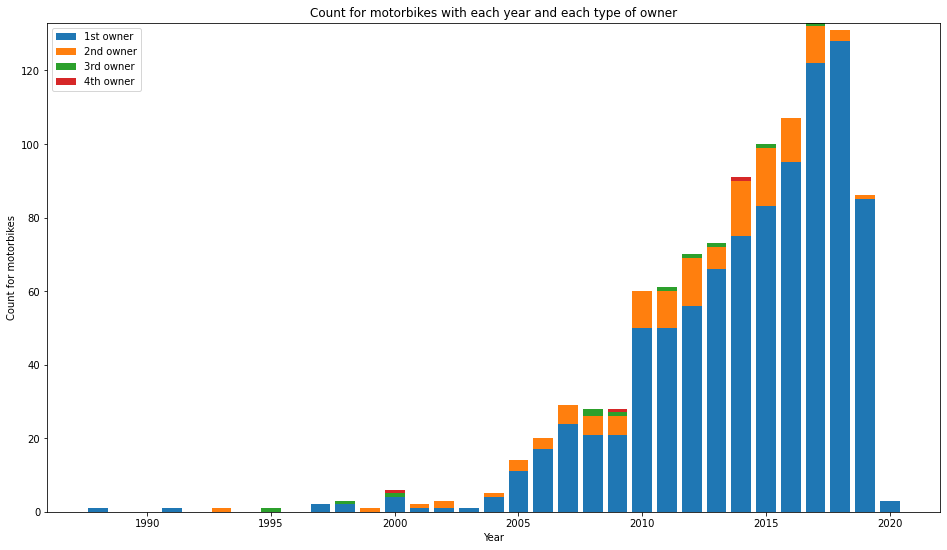

In [43]:
plt.subplots(figsize = (16,9))
y1 = year_owner.loc[:, "1st owner"]
y2 = year_owner.loc[:, "2nd owner"]
y3 = year_owner.loc[:, "3rd owner"]
y4 = year_owner.loc[:, "4th owner"]
p1 = plt.bar(x = bike.year.astype("category").cat.categories, height = y1)
p2 = plt.bar(x = bike.year.astype("category").cat.categories, height = y2, bottom = y1)
p3 = plt.bar(x = bike.year.astype("category").cat.categories, height = y3, bottom = y1+y2)
p4 = plt.bar(x = bike.year.astype("category").cat.categories, height = y4, bottom = y1+y2+y3)
plt.xlabel("Year")
plt.ylabel("Count for motorbikes")
plt.title("Count for motorbikes with each year and each type of owner")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1st owner', '2nd owner', '3rd owner', '4th owner'), loc = 0)
plt.show()
plt.close()

We can find that the total sample is a negative skew. Let's create a side-by-side bar plot to compare the distributions of different owner.

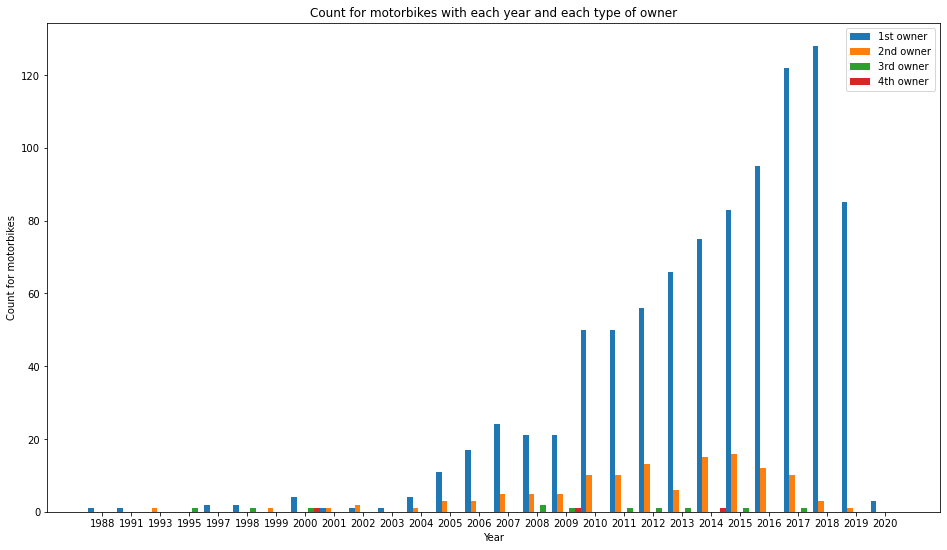

In [44]:
labels = bike.year.astype("category").cat.categories
length = len(labels)
width = 0.8
plt.subplots(figsize = (16,9))
p1 = plt.bar(x = [i - width/2 for i in range(0, length)], height = y1, width = width/4)
p2 = plt.bar(x = [i - width/4 for i in range(0, length)], height = y2, width = width/4)
p3 = plt.bar(x = [i + width/4 for i in range(0, length)], height = y3, width = width/4)
p4 = plt.bar(x = [i + width/2 for i in range(0, length)], height = y4, width = width/4)
plt.xticks(range(0, length), labels) #(list of positions, list of labels)
plt.xlabel("Year")
plt.ylabel("Count for motorbikes")
plt.title("Count for motorbikes with each year and each type of owner")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1st owner', '2nd owner', '3rd owner', '4th owner'), loc = 0)
plt.show()
plt.close()

**From the above figure, we cannot make an analysis the distribution of "3rd owner" and "4th owner" because the number is so mall. Both the distribution of "1st owner" and the distribution of "2nd owner" are negative skew. But the sharp of "1st owner" is righter than the sharp of "2nd owner".**

## Prediction of selling_price

### Using a Grid Search Algorithm

#### Just y:

Define a RMSE function.

In [21]:
def RMSE(y,c):
    return np.sqrt(np.sum((y-c)**2)/len(y))

Let's print the center of the `selling_price`.

In [24]:
[bike.selling_price.mean(), bike.selling_price.median()]

[59638.151743638075, 45000.0]

Create a grid between the range 30000 to 70000 and calculate the RMSE for each c.

In [25]:
smallest_RMSE = 10**8
c0 = 0
for c in range(30000,70000):
    if RMSE(bike.selling_price,c) < smallest_RMSE:
        smallest_RMSE = RMSE(bike.selling_price,c)
        c0 = c
print([c0,smallest_RMSE])

[59638, 56277.75212166089]


From above cell, we can find that when c = 59638, the RMSE is smallest with a value of 56277.75212166089.

to make sure your algorithm generalizes, run it using the `km_driven` variable as the response.

In [26]:
[bike.km_driven.mean(), bike.km_driven.median()]

[34359.83317624882, 25000.0]

In [27]:
smallest_RMSE = 10**8
c0 = 0
for c in range(20000,50000):
    if RMSE(bike.km_driven,c) < smallest_RMSE:
        smallest_RMSE = RMSE(bike.km_driven,c)
        c0 = c
print([c0,smallest_RMSE])

[34360, 51598.81937376337]


From above cell, we can find that when c = 34360, the RMSE is smallest with a value of 51598.81937376337.

#### Using y and another numeric variable x:

$$selling\_price = b_1 * km\_driven + b_0$$

In [31]:
smallest_RMSE = 10**8
for b0 in range(60000,70000):
    for b1 in range(-100,100):
        if RMSE(b1/100 * bike.km_driven + b0,bike.selling_price) < smallest_RMSE:
            smallest_RMSE = RMSE(b1/100 * bike.km_driven + b0,bike.selling_price)
            opt_b0 = b0
            opt_b1 = b1/100
print([opt_b0,opt_b1,smallest_RMSE])

[67541, -0.23, 54987.199961143866]


From above cell, when b0 = 67541, b0 = -0.23, the RMSE is smallest with a value of 54987.199961143866

Let's predict the `selling_price` for `km_driven` of 10000, 25000, 35000.

In [32]:
print([10000, opt_b1 * 10000 + opt_b0])
print([25000, opt_b1 * 25000 + opt_b0])
print([35000, opt_b1 * 35000 + opt_b0])

[10000, 65241.0]
[25000, 61791.0]
[35000, 59491.0]


### Using a Gradient Descent Algorithm

#### Just y:

Let's firstly set the initial value:

In [55]:
num_tol = 0.001
delta = 0.001
step_size = 0.5

Define a function diff_quotient:

In [36]:
def diff_quotient(y,c):
    return (RMSE(y,c+delta) - RMSE(y,c))/delta

In [56]:
cur_c = 50000
new_c = cur_c - diff_quotient(bike.selling_price, cur_c) * step_size
i = 0
while abs(new_c - cur_c) >= num_tol:
    i = i+1
    cur_c = new_c
    new_c = cur_c - diff_quotient(bike.selling_price, cur_c) * step_size
    if i > 1000000:
        break
cur_c = new_c
print(cur_c,RMSE(bike.selling_price, cur_c))

59525.59740916331 56277.86467450848


Print the number of iterations.

In [57]:
i

501697

After the iterations, when c = 59525.59740916331, there is a smallest RMSE of 56277.86467450848 under num_tol = 0.001.

To make sure my algorithm generalizes, run it using the `km_driven` variable as the response.

In [58]:
cur_c = 30000
new_c = cur_c - diff_quotient(bike.km_driven, cur_c) * step_size
i = 0
while abs(new_c - cur_c) >= num_tol:
    i = i+1
    cur_c = new_c
    new_c = cur_c - diff_quotient(bike.km_driven, cur_c) * step_size
    if i > 1000000:
        break
cur_c = new_c
print(cur_c,RMSE(bike.km_driven, cur_c))

34256.636200127105 51598.922569704


In [59]:
i

386507

After the iterations, when c = 34256.636200127105, there is a smallest RMSE of 51598.922569704 under num_tol = 0.001.

#### Using y and another numeric variable x:

Define a new RMSE function:

In [60]:
def RMSE2(y,x,b0,b1):
    return np.sqrt(np.sum((y-b0-b1*x)**2)/len(y))

Define 2 new diff_quotient functions:

In [65]:
def diff_quotient_b0(y,x,b0,b1):
    return (RMSE2(y,x,b0+delta,b1) - RMSE2(y,x,b0,b1))/delta
def diff_quotient_b1(y,x,b0,b1):
    return (RMSE2(y,x,b0,b1+delta) - RMSE2(y,x,b0,b1))/delta

Set initial values:

In [62]:
delta = 0.001
step_size0 = 1
step_size1 = 0.000005

Define a function for 2D Euclidean Distance:

In [63]:
def Euclidean2D(x1,x2,y1,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [67]:
cur_b0 = 60000
cur_b1 = 0
new_b0 = cur_b0 - diff_quotient_b0(bike.selling_price, bike.km_driven, cur_b0, cur_b1) * step_size0
new_b1 = cur_b1 - diff_quotient_b1(bike.selling_price, bike.km_driven, new_b0, cur_b1) * step_size1
i = 0
while Euclidean2D(cur_b0,new_b0,cur_b1,new_b1) >= num_tol:
    i = i+1
    cur_b0 = new_b0
    cur_b1 = new_b1
    new_b0 = cur_b0 - diff_quotient_b0(bike.selling_price, bike.km_driven, cur_b0, cur_b1) * step_size0
    new_b1 = cur_b1 - diff_quotient_b1(bike.selling_price, bike.km_driven, new_b0, cur_b1) * step_size1
    if i > 1000000:
        break
cur_b0 = new_b0
cur_b1 = new_b1
print(cur_b0,cur_b1,RMSE2(bike.selling_price, bike.km_driven, cur_b0, cur_b1))

67563.50042211852 -0.23225767738149686 54987.10537401946


Make sure i is equal or less than 10000000.

In [68]:
i

362781

In [69]:
opt_b0 = cur_b0
opt_b1 = cur_b1

In [71]:
[opt_b0,opt_b1]

[67563.50042211852, -0.23225767738149686]

Now, let's predict the `selling_price` when `km_driven` is 10000, 25000 or 35000

In [72]:
print([10000, opt_b0 + opt_b1*10000])
print([25000, opt_b0 + opt_b1*25000])
print([35000, opt_b0 + opt_b1*35000])

[10000, 65240.92364830356]
[25000, 61757.058487581104]
[35000, 59434.48171376613]
